It's a new beginning!

Link to our online report: https://typst.app/project/wI0RIX8aviQqNUjKVplkFj

In [15]:
# testing
import perceptron as pc
from sklearn.linear_model import Perceptron as SKLearnPerceptron
from sklearn.metrics import f1_score  # f1 score .. will be important at the end
import numpy as np

X_train = np.array([[2, 3], [1, 1], [2, 1], [3, 2], [3, 1]])
y_train = np.array([1, -1, -1, 1, -1])  # label
X_test = np.array([[1, 2], [3, 3], [2, 2]])
y_true = np.array([-1, 1, 1])  # testing label

# self-design perception
model = pc.Perceptron(alpha=0.1)
model.train(X_train, y_train, epochs=20)
y_pred_custom = model.predict(X_test)

# scikit-learn perception
sk_model = SKLearnPerceptron(alpha=0.1, max_iter=10, tol=None)
sk_model.fit(X_train, y_train)
y_pred_sklearn = sk_model.predict(X_test)

# compare
print("Custom Perceptron Predictions:", y_pred_custom)
print("Scikit-learn Perceptron Predictions:", y_pred_sklearn)

# validate
if np.array_equal(y_pred_custom, y_pred_sklearn):
    print("Custom implementation matches scikit-learn!")
else:
    print("There are discrepancies. Debug the custom implementation.")

Validation Accuracy: 100.00%
Validation precision: 100.00%
Validation recall: 100.00%
Validation f1_score: 1.00
Custom Perceptron Predictions: [1 1 1]
Scikit-learn Perceptron Predictions: [1 1 1]
Custom implementation matches scikit-learn!


In [16]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np

Shape of data (features): (1797, 64)
Shape of images: (1797, 8, 8)
Shape of target: (1797,)
Target classes: [0 1 2 3 4 5 6 7 8 9]


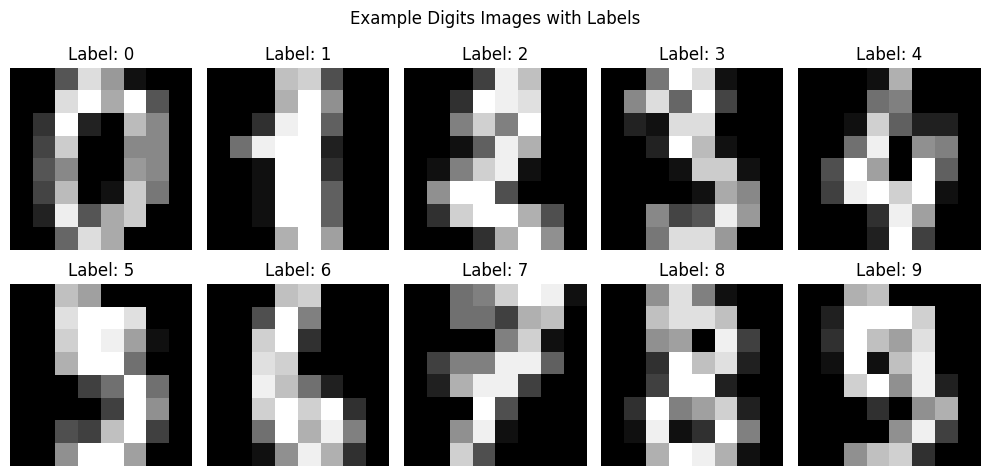

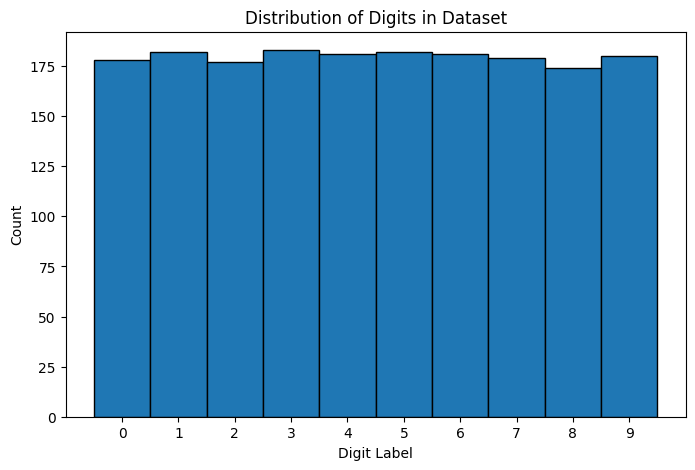

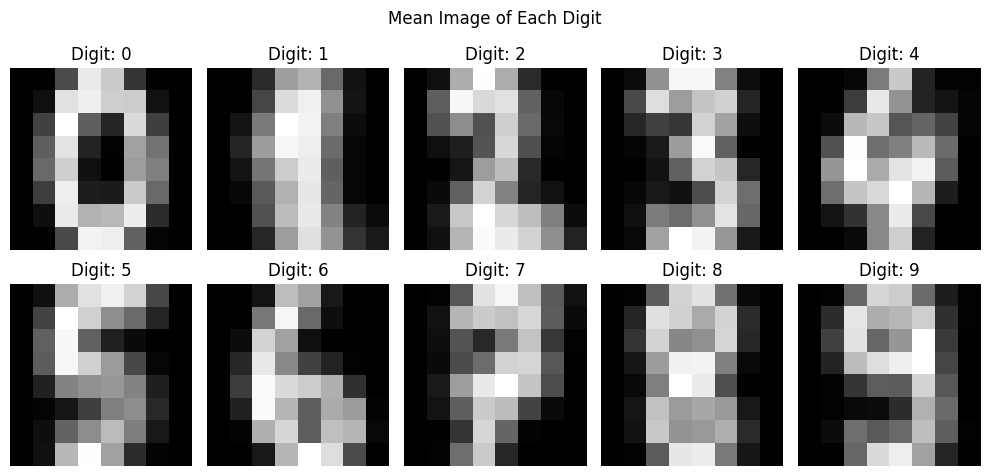

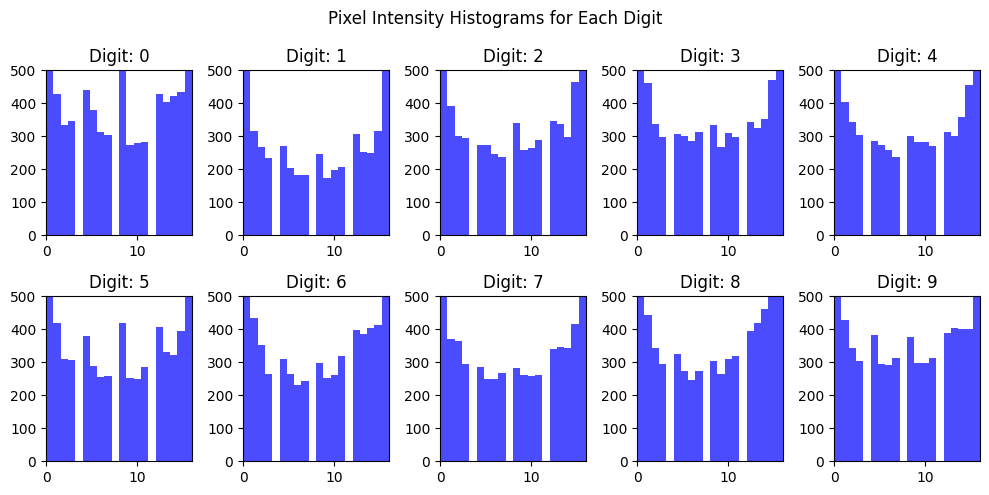

In [17]:
# Load the dataset
digits = load_digits()
X = digits.data
y = digits.target
# Print dataset details
print("Shape of data (features):", digits.data.shape)  # Feature matrix (n_samples, n_features)
print("Shape of images:", digits.images.shape)        # Images (n_samples, 8, 8)
print("Shape of target:", digits.target.shape)        # Labels (n_samples,)
print("Target classes:", np.unique(digits.target))    # Unique digit classes

# Plot some example images with their labels
fig, axes = plt.subplots(2, 5, figsize=(10, 5))  # Create a grid of 2x5
plt.suptitle("Example Digits Images with Labels")
for ax, idx in zip(axes.ravel(), range(10)):  # Iterate through first 10 images
    ax.imshow(digits.images[idx], cmap='gray')
    ax.set_title(f"Label: {digits.target[idx]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

# Plot the distribution of the target labels
plt.figure(figsize=(8, 5))
plt.hist(digits.target, bins=np.arange(11) - 0.5, edgecolor='black')
plt.xticks(range(10))
plt.title("Distribution of Digits in Dataset")
plt.xlabel("Digit Label")
plt.ylabel("Count")
plt.show()

# Visualize the mean image of each digit
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
plt.suptitle("Mean Image of Each Digit")
for ax, digit in zip(axes.ravel(), range(10)):
    mean_image = digits.images[digits.target == digit].mean(axis=0)  # Compute mean image
    ax.imshow(mean_image, cmap='gray')
    ax.set_title(f"Digit: {digit}")
    ax.axis('off')
plt.tight_layout()
plt.show()

# Visualize pixel intensity histograms for all digits
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
plt.suptitle("Pixel Intensity Histograms for Each Digit")
for ax, digit in zip(axes.ravel(), range(10)):
    digit_data = digits.images[digits.target == digit].reshape(-1)  # Flatten all images of the digit
    ax.hist(digit_data, bins=20, color='blue', alpha=0.7)
    ax.set_title(f"Digit: {digit}")
    ax.set_xlim(0, 16)  # Pixel values range from 0 to 16
    ax.set_ylim(0, 500)
plt.tight_layout()
plt.show()

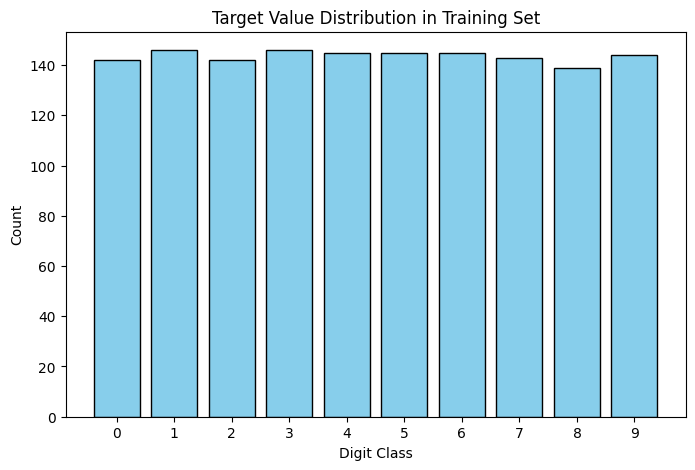

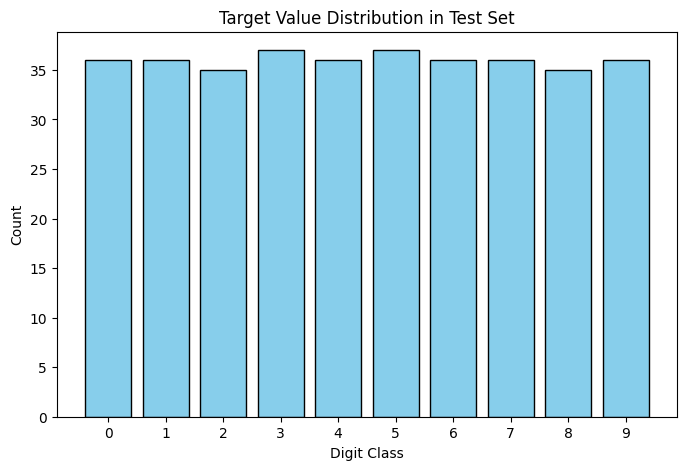

In [18]:
from sklearn.model_selection import train_test_split
# Ensure data is balanced during split
def balanced_split(X, y, test_size, random_state=None):
    """
    Splits the data into train/test sets while keeping class distribution balanced.
    """
    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=random_state
    )
    return X_train, X_temp, y_train, y_temp

# Split into train + test(The split of validation is in training session)
X_train, X_test, y_train, y_test = balanced_split(X, y, test_size=0.2, random_state=42)


# Function to plot target value distributions
def plot_target_distribution(y, split_name):
    unique, counts = np.unique(y, return_counts=True)
    plt.figure(figsize=(8, 5))
    plt.bar(unique, counts, color='skyblue', edgecolor='black')
    plt.xticks(unique)
    plt.title(f"Target Value Distribution in {split_name}")
    plt.xlabel("Digit Class")
    plt.ylabel("Count")
    plt.show()
    
def Accuracy(y_pred, y):
    '''
    OUTPUT :
    - accuracy: compare two outputs, calculate their accuracy
    '''
    val_accuracy = np.mean(y_pred == y)
    print(f"Testing Accuracy: {val_accuracy * 100:.2f}%")
    return val_accuracy

# Plot distributions for each split
plot_target_distribution(y_train, "Training Set")
plot_target_distribution(y_test, "Test Set")

In [19]:
# Store the binary labels for all classes
binary_y_train = {}
binary_y_test = {}

# Iterate over each digit (0 to 9)
for k in range(10):
    # Create binary labels for class k in training set
    y_train_k = np.copy(y_train)
    y_train_k[y_train_k != k] = -1  # Set all other classes to -1
    y_train_k[y_train_k == k] = 1   # Set class k to 1
    binary_y_train[k] = y_train_k

    # Create binary labels for class k in test set
    y_test_k = np.copy(y_test)
    y_test_k[y_test_k != k] = -1  # Set all other classes to -1
    y_test_k[y_test_k == k] = 1   # Set class k to 1
    binary_y_test[k] = y_test_k



# Now binary_y_train[k] and binary_y_test[k] contain the binary labels for digit k


In [20]:
'''# Plot some example images with their labels
fig, axes = plt.subplots(2, 5, figsize=(10, 5))  # Create a grid of 2x5
plt.suptitle("Trained Digits Images with Labels")
for ax, idx in zip(axes.ravel(), range(10)):  # Iterate through first 10 images
    ax.imshow(y_test_1[idx], cmap='gray')
    ax.set_title(f"Label: {digits.target[idx]}")
    ax.axis('off')
plt.tight_layout()
plt.show()'''


'# Plot some example images with their labels\nfig, axes = plt.subplots(2, 5, figsize=(10, 5))  # Create a grid of 2x5\nplt.suptitle("Trained Digits Images with Labels")\nfor ax, idx in zip(axes.ravel(), range(10)):  # Iterate through first 10 images\n    ax.imshow(y_test_1[idx], cmap=\'gray\')\n    ax.set_title(f"Label: {digits.target[idx]}")\n    ax.axis(\'off\')\nplt.tight_layout()\nplt.show()'

In [21]:
binary_y_train[0].shape

(1437,)

In [22]:
#training
alpha=0.01
accuracy = {}
f1s={}
models = {}
# Iterate training over each digit (0 to 9)
for k in range(10):
    print(f"Model: ", k)
    # Create binary labels for class k in training set
    model_k = pc.Perceptron(alpha)
    model_k.train(X_train, binary_y_train[k], epochs=50)
    y_pred = model_k.predict(X_test)
    accuracy[k] = model_k.accuracy(y_pred,binary_y_test[k])
    # print(dir(model_k))
    precision, recall, f1 = model_k.precision_recall_f1(y_pred, binary_y_test[k])
    f1s[k] = f1 #add model k f1 to dictionary
    models[k] = model_k
    print("~"*20)

# Calculate Average Accuracy and Average F1-Score for Binary Classifiers
avg_accuracy = np.mean(list(accuracy.values()))
avg_f1 = np.mean(list(f1s.values()))

print("End performance:")
print(f"Average Accuracy: {avg_accuracy * 100:.2f}%")
print(f"Average F1-score: {avg_f1:.2f}")

Model:  0
Validation Accuracy: 99.72%
Validation precision: 100.00%
Validation recall: 97.22%
Validation f1_score: 0.99
Testing Accuracy: 99.44%
Testing precision: 97.22%
Testing recall: 97.22%
Testing f1_score: 0.97
~~~~~~~~~~~~~~~~~~~~
Model:  1
Validation Accuracy: 98.33%
Validation precision: 94.29%
Validation recall: 89.19%
Validation f1_score: 0.92
Testing Accuracy: 96.94%
Testing precision: 83.78%
Testing recall: 86.11%
Testing f1_score: 0.85
~~~~~~~~~~~~~~~~~~~~
Model:  2
Validation Accuracy: 99.17%
Validation precision: 92.31%
Validation recall: 100.00%
Validation f1_score: 0.96
Testing Accuracy: 99.72%
Testing precision: 97.22%
Testing recall: 100.00%
Testing f1_score: 0.99
~~~~~~~~~~~~~~~~~~~~
Model:  3
Validation Accuracy: 98.06%
Validation precision: 89.47%
Validation recall: 91.89%
Validation f1_score: 0.91
Testing Accuracy: 98.06%
Testing precision: 89.47%
Testing recall: 91.89%
Testing f1_score: 0.91
~~~~~~~~~~~~~~~~~~~~
Model:  4
Validation Accuracy: 99.44%
Validation 

In [23]:
#combined model
y_Test = np.copy(y_test)
fill_value=-1
y_Pred = np.full_like(y_test, fill_value)
for k in range(10):
    y_pred_k = models[k].predict(X_test)
    y_Pred[(y_pred_k == 1) & (y_Pred == fill_value)] = k
    
combined_accuracy = Accuracy(y_Pred,y_Test)
combined_f1 = f1_score(y_Test, y_Pred, average='macro')
print(f"Combined F1-score: {combined_f1:.2f}")

Testing Accuracy: 87.78%
Combined F1-score: 0.82


In [24]:
y_Test,y_Pred

(array([5, 2, 8, 1, 7, 2, 6, 2, 6, 5, 0, 5, 9, 3, 4, 4, 2, 4, 9, 9, 6, 3,
        8, 1, 2, 5, 6, 0, 3, 4, 6, 7, 2, 6, 6, 6, 6, 5, 0, 9, 1, 7, 9, 6,
        5, 7, 5, 2, 7, 5, 0, 8, 5, 5, 3, 2, 4, 0, 0, 2, 7, 5, 6, 1, 3, 7,
        6, 5, 7, 0, 9, 0, 3, 8, 2, 5, 8, 2, 3, 5, 9, 3, 2, 7, 9, 6, 8, 1,
        0, 1, 2, 9, 4, 9, 1, 2, 7, 8, 4, 2, 6, 9, 3, 7, 3, 9, 6, 1, 1, 0,
        9, 2, 1, 6, 3, 4, 8, 7, 1, 0, 0, 4, 6, 5, 8, 2, 8, 8, 3, 0, 0, 8,
        6, 4, 3, 9, 3, 3, 3, 3, 0, 7, 0, 0, 1, 9, 5, 8, 1, 5, 0, 6, 6, 6,
        6, 1, 7, 7, 6, 7, 7, 8, 7, 3, 6, 5, 9, 0, 3, 8, 0, 9, 8, 1, 9, 5,
        9, 5, 8, 9, 9, 7, 9, 1, 9, 5, 4, 7, 3, 0, 4, 9, 7, 7, 5, 6, 5, 8,
        3, 4, 5, 4, 9, 2, 5, 5, 2, 1, 3, 8, 8, 9, 3, 6, 1, 0, 1, 4, 0, 5,
        5, 6, 6, 7, 4, 3, 8, 4, 1, 0, 7, 9, 2, 8, 4, 8, 4, 2, 4, 0, 0, 0,
        2, 6, 7, 0, 4, 5, 2, 2, 9, 0, 4, 6, 8, 2, 3, 9, 2, 3, 0, 6, 8, 7,
        1, 4, 4, 1, 1, 6, 3, 8, 1, 2, 5, 7, 8, 3, 2, 0, 3, 4, 1, 9, 9, 9,
        6, 3, 7, 1, 6, 9, 4, 7, 1, 8, 

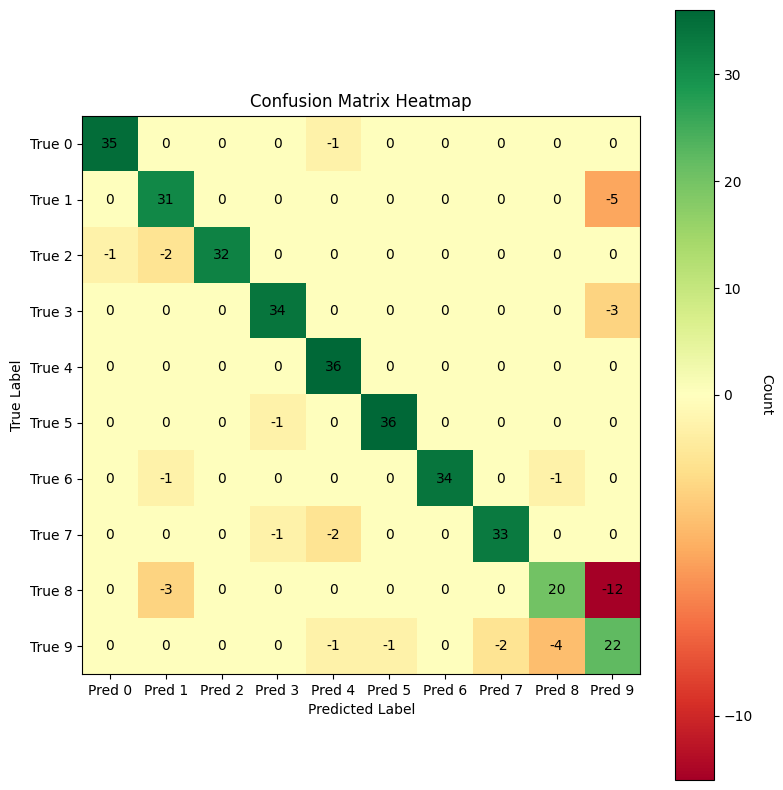

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

# Recreating the confusion matrix for visualization (adjust as needed for real data)
confusion_matrix = np.zeros((10, 10))
for t, p in zip(y_Test, y_Pred):
    if t==p:
        confusion_matrix[t, p] += 1
    if t!=p:
        confusion_matrix[t, p] -= 1

# Setting up the color map with white at 0, red for negatives, green for positives
norm = TwoSlopeNorm(vmin=confusion_matrix.min(), vcenter=0, vmax=confusion_matrix.max())
cmap = plt.cm.RdYlGn

# Plotting the heatmap
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(confusion_matrix, cmap=cmap, norm=norm)

# Adding color bar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label("Count", rotation=270, labelpad=15)

# Labeling the axes
ax.set_xticks(np.arange(10))
ax.set_yticks(np.arange(10))
ax.set_xticklabels([f"Pred {i}" for i in range(10)])
ax.set_yticklabels([f"True {i}" for i in range(10)])

# Adding annotations
for i in range(10):
    for j in range(10):
        text = ax.text(j, i, int(confusion_matrix[i, j]),
                       ha="center", va="center",
                       color="black")

# Adding gridlines for better visualization
ax.set_title("Confusion Matrix Heatmap")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
plt.tight_layout()
plt.show()
